In [2]:
import numpy as np
import matplotlib.pyplot as plt
#for entropy minimization on data
from scipy.optimize import minimize
from functools import partial, lru_cache
from scipy.integrate import quad

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

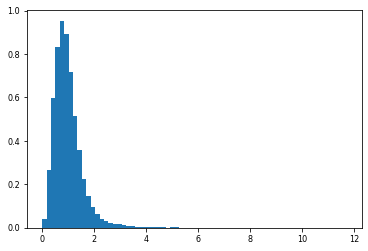

In [3]:
s = np.genfromtxt("hermitian_spacings.txt")
s_diagonal = np.genfromtxt("diagonal_spacings.txt")

#create bins; max s = 11

_ = plt.hist(s, density = True, bins=np.linspace(0, max(s),70))

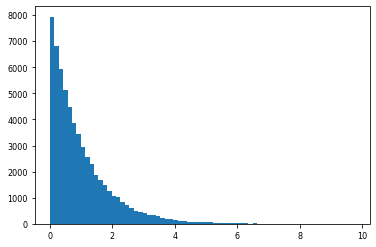

In [4]:
_ = plt.hist(s_diagonal, bins=np.linspace(0, max(s_diagonal),70))

In [39]:
#entropy minimization on data
def log_wigner_function(x, b, alfa, beta):
    return np.log(x)*alfa - b*x**beta

def log_wigner_model(x, b, alfa, beta):
    """Model for the probability distribution."""
    return log_wigner_function(x, b, alfa, beta) - log_normalization(b, alfa, beta)

# small optimization: cache the last-recently-used results
# for the integral computation
@lru_cache() 
def log_normalization(b, alfa, beta):
    log_f = partial(log_wigner_function, b=b, alfa=alfa, beta=beta)
    return np.log(quad(lambda x : np.exp(log_f(x)), 0, np.inf)[0]) # quad also returns the estimated error of integration

def entropy(data, log_model):
    return np.average(-log_model(data))

def score(params):
    """Given the parameters of the distribution, 
    return the entropy computed on the data."""
    b, alfa, beta = params
    model = partial(log_wigner_model, b = b, alfa = alfa, beta = beta)
    return entropy(nums, model)


#good form because it comes from a module, not necessary here 
#https://www.geeksforgeeks.org/what-does-the-if-__name__-__main__-do/
if __name__ == "__main__":

    #nums is data, x0 initial guess comes from theory 
    nums = s[s<4]
    
    
    th_params = [4 / np.pi, 2, 2]
    
    result = minimize(score, x0=th_params, 
                      method='CG', 
                     )
#     different solvers are found at https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
    

    print(result.x)
    print(f'entropy with current optimization = {result.fun:.3f}')
    print(f'entropy for th params = {score(th_params):.3f}')
    print(f'(less entropy means a better fit)')


[7.36600481 4.13606817 0.72613525]
entropy with current optimization = 0.629
entropy for th params = 0.699
(less entropy means a better fit)


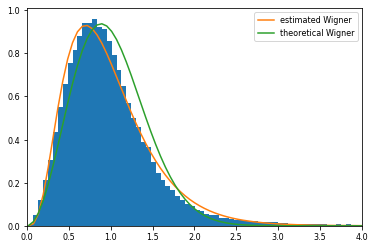

In [36]:
vals, bins, _ = plt.hist(s, density = True, bins=200)
plt.plot(bins, np.exp(log_wigner_model(bins, *result.x)), label='estimated Wigner')
plt.plot(bins, np.exp(log_wigner_model(bins, 4 / np.pi, 2, 2)), label='theoretical Wigner')
plt.xlim(0, 4)

plt.legend()

In [37]:
np.exp(log_normalization(4 / np.pi, 2,  2))

0.3084251375340424

In [38]:
1 / (32 / np.pi**2)
# the theoretical parameters are internally consistent!

0.30842513753404244